<a href="https://colab.research.google.com/github/DeepthiTabithaBennet/OperationsResearch/blob/main/CPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Written by Deepthi Tabitha Bennet

In [ ]:
!pip install cheche_pm

In [ ]:
import numpy as np
import pandas as pd
import cheche_pm
from cheche_pm import Project

In [ ]:
p = Project() # create empty project instance

In [ ]:
num = int(input("Enter the Number of Activities : "))
for i in range(0, num):
    act_name = input("\nEnter the Name of the Activity : ")
    act_dur = int(input("Enter the Duration of the Activity : "))
    act_prec = input("Enter the Preceeding Activities of the Activity (Separated by Commas) : ").replace(" ", "").split()
    p.add_activity(activity_name=act_name, activity_duration=act_dur, activity_precedence=act_prec, a_desc=str(i+1), activity_resources=[0,0,0])


# p.add_activity(activity_name='A',activity_duration = 5, activity_precedence= [None], a_desc= 'F.House', activity_resources=[0,0,0])
# p.add_activity(activity_name='B',activity_duration = 2, activity_precedence= [None], a_desc= 'F.Pool', activity_resources=[0,0,0])
# p.add_activity(activity_name='C',activity_duration = 5, activity_precedence= ['A'], a_desc= 'Walls', activity_resources=[0,0,0])
# p.add_activity(activity_name='D',activity_duration = 6, activity_precedence= ['B'], a_desc= 'Pool', activity_resources=[0,0,0])
# p.add_activity(activity_name='E',activity_duration = 5, activity_precedence= ['C'], a_desc= 'Roof', activity_resources=[0,0,0])
# p.add_activity(activity_name='F',activity_duration = 2, activity_precedence= ['C'], a_desc= 'Windows', activity_resources=[0,0,0])
# p.add_activity(activity_name='G',activity_duration = 3, activity_precedence= ['C'], a_desc= 'Electricity', activity_resources=[0,0,0])
# p.add_activity(activity_name='H',activity_duration = 2, activity_precedence= ['E'], a_desc= 'S.Panels', activity_resources=[0,0,0])
# p.add_activity(activity_name='I',activity_duration = 4, activity_precedence= ['F'], a_desc= 'Plumbing', activity_resources=[0,0,0])
# p.add_activity(activity_name='J',activity_duration = 3, activity_precedence= ['H,I'], a_desc= 'Finishings', activity_resources=[0,0,0])

/usr/local/lib/python3.10/dist-packages/cheche_pm/cheche_pm.py:660: UserWarning: !WARNING: Creating dummy variables and creating the project network...
  warnings.warn("!WARNING: Creating dummy variables and creating the project network...")
/usr/local/lib/python3.10/dist-packages/cheche_pm/cheche_pm.py:664: UserWarning: !WARNING: Creating Project data dictionary...
  warnings.warn("!WARNING: Creating Project data dictionary...")


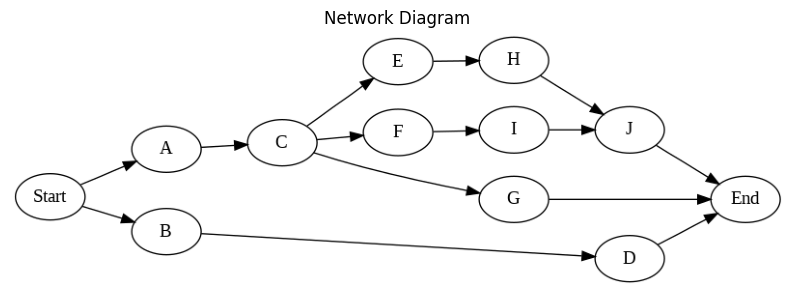

In [ ]:
p.plot_network_diagram(plot_type='dot')

In [ ]:
p.create_project_dict()
out_df = pd.DataFrame(p.PROJECT).T

In [ ]:
p.CPM(verbose=True)

FORWARD PASS...

Current task on the iteration = [Start]
The precedence constraints of activity Start are = None
The activity is the [Start] so we continue to the next one, since its start and finish are equal to 0
----------------------------------------------------------------------------------------------------
Current task on the iteration = [A]
The precedence constraints of activity A are = ['Start']
The finish dates of the precedence constraints of activity [A] are = [0]
The start date of activity [A] is the maximun of the finish dates of its precedence constraints which is equal to (0)
The finish date of activity [A] is then the start:(0) plus the duration:(5) so the finish date is equal to (5)
----------------------------------------------------------------------------------------------------
Current task on the iteration = [B]
The precedence constraints of activity B are = ['Start']
The finish dates of the precedence constraints of activity [B] are = [0]
The start date of acti

,ES,EF,LS,LF,F,D
Start,0,0,0,0,0,0
A,0,5,0,5,0,5
B,0,2,12,14,12,2
C,5,10,5,10,0,5
D,2,8,14,20,12,6
E,10,15,10,15,0,5
F,10,12,11,13,1,2
G,10,13,17,20,7,3
H,15,17,15,17,0,2
I,12,16,13,17,1,4


In [ ]:
pd.DataFrame(p.cpm_schedule).T

,ES,EF,LS,LF,F,D,IS,TS,NUM_IS,NUM_TS,idx,D_IS,SUM_D_IS,SUM_RES_IS,SUM_RES_TS,GRPW
Start,0,0,0,0,0,0,"[A, B]","[J, I, D, F, H, B, A, E, G, C]",2,10,0,"[5, 2]",7,0,0,7
A,0,5,0,5,0,5,[C],"[J, I, F, H, E, G, C]",1,7,1,[5],5,0,0,10
B,0,2,12,14,12,2,[D],[D],1,1,2,[6],6,0,0,8
C,5,10,5,10,0,5,"[E, F, G]","[J, I, F, E, G, H]",3,6,3,"[5, 2, 3]",10,0,0,15
D,2,8,14,20,12,6,[],[],0,0,4,[0],0,0,0,6
E,10,15,10,15,0,5,[H],"[J, H]",1,2,5,[2],2,0,0,7
F,10,12,11,13,1,2,[I],"[J, I]",1,2,6,[4],4,0,0,6
G,10,13,17,20,7,3,[],[],0,0,7,[0],0,0,0,3
H,15,17,15,17,0,2,[J],[J],1,1,8,[3],3,0,0,5
I,12,16,13,17,1,4,[J],[J],1,1,9,[3],3,0,0,7


In [ ]:
p.get_critical_path()

['Start', 'A', 'C', 'E', 'H', 'J', 'End']